# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
#!pip install palmerpenguins

In [3]:
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from plotnine import *

In [4]:
penguins = load_penguins()
penguins = penguins.dropna()
X = penguins.drop("bill_length_mm", axis = 1) #X is still a dataframe, can have many columns
y = penguins["bill_length_mm"] #1D just one column of ur y
X_train, X_test, y_train, y_test = train_test_split(X,y)

X_train

,species,island,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,17.4,186.0,3800.0,female,2007
290,Chinstrap,Dream,17.1,190.0,3575.0,female,2007
195,Gentoo,Biscoe,15.0,216.0,4750.0,male,2008
254,Gentoo,Biscoe,15.5,215.0,4975.0,female,2009
313,Chinstrap,Dream,20.7,210.0,4800.0,male,2008
...,...,...,...,...,...,...,...
118,Adelie,Torgersen,17.0,189.0,3350.0,female,2009
71,Adelie,Torgersen,18.4,190.0,3900.0,male,2008
255,Gentoo,Biscoe,15.0,228.0,5500.0,male,2009
307,Chinstrap,Dream,20.8,201.0,4300.0,male,2008


In [5]:
#first step: prep data: one-hot-encode
#second step: model fitting - linear regressions
#this is a "recipe"

lr = LinearRegression() #make linear regression function
enc = OneHotEncoder() #get dummy variable ready

ct = ColumnTransformer(
    [("dummify_s", enc, ["species"]),
    ("dummify_i", enc, ["island"]),
    ("dummify_sex", enc, ["sex"])]
) #dummifying multiple columns, only one list of multiple columns

my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)] #labeling each step
) #run data through this pipeline to dummify and then run linear regression

In [6]:
#model fiting
fitted_my_pipeline = my_pipeline.fit(X_train, y_train)
fitted_my_pipeline

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [7]:
y_preds = fitted_my_pipeline.predict(X_test)
y_preds

array([36.875    , 49.1875   , 45.46875  , 49.1875   , 36.7265625,
       45.46875  , 45.46875  , 40.4453125, 45.46875  , 45.46875  ,
       40.59375  , 40.4453125, 36.7265625, 50.7734375, 49.1875   ,
       36.7265625, 49.1875   , 40.59375  , 45.46875  , 49.1875   ,
       40.4453125, 45.46875  , 47.046875 , 36.875    , 45.46875  ,
       40.59375  , 36.875    , 45.46875  , 40.4453125, 36.875    ,
       49.1875   , 49.1875   , 40.59375  , 45.46875  , 49.1875   ,
       50.7734375, 49.1875   , 45.46875  , 40.8984375, 36.875    ,
       50.7734375, 49.1875   , 50.7734375, 45.46875  , 49.1875   ,
       36.875    , 45.46875  , 45.46875  , 45.46875  , 49.1875   ,
       37.1796875, 47.046875 , 40.4453125, 49.1875   , 36.7265625,
       37.1796875, 50.7734375, 40.59375  , 36.875    , 49.1875   ,
       49.1875   , 50.7734375, 40.4453125, 45.46875  , 47.046875 ,
       49.1875   , 47.046875 , 50.7734375, 49.1875   , 50.7734375,
       40.59375  , 50.7734375, 50.7734375, 47.046875 , 49.1875

In [8]:
enc.fit_transform(penguins) #saved as sparse matrix, too many columns

#dummify species, island, and sex, only should have made 9 new columns, not 400+
enc.fit_transform(penguins[["species"]]) #3 columns, this is better

<333x3 sparse matrix of type '<class 'numpy.float64'>'
	with 333 stored elements in Compressed Sparse Row format>

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

#### Linear

In [9]:
# Code Here
X = penguins[["bill_length_mm"]] #X is still a dataframe, can have many columns
y = penguins["bill_depth_mm"] #1D just one column of ur y
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y)

X_train1


,bill_length_mm
221,50.7
191,48.7
265,51.5
279,45.4
77,37.2
...,...
44,37.0
311,47.5
276,46.5
7,39.2


In [10]:

# ct = ColumnTransformer(
#     [("dummify_s", enc, ["species"]),
#     ("dummify_i", enc, ["island"]),
#     ("dummify_sex", enc, ["sex"])]
# ) #dummifying multiple columns, only one list of multiple columns

my_pipeline_linear = Pipeline(
    [('ols', lr)] #labeling each step
)

fitted_my_pipeline_linear = my_pipeline_linear.fit(X_train1, y_train1)
fitted_my_pipeline_linear

y_preds_linear = fitted_my_pipeline_linear.predict(X_test1)
y_preds_linear


array([17.46458724, 17.07980342, 17.92953437, 17.40847294, 16.77518289,
       16.74311757, 17.15195039, 17.78524043, 16.70303592, 17.1279014 ,
       17.76119144, 17.4806199 , 18.00168133, 17.35235863, 16.9114605 ,
       17.72110979, 17.59284852, 17.17599938, 17.70507714, 17.44855458,
       17.4806199 , 16.69501959, 16.43048071, 17.01567278, 16.88741151,
       16.80724821, 17.05575443, 16.89542784, 17.30426065, 17.15195039,
       17.84135474, 16.84732986, 16.66295428, 17.07178709, 16.82328087,
       16.87137885, 16.35833375, 18.01771399, 16.70303592, 16.6148563 ,
       16.98360746, 17.03170544, 17.16798305, 17.39244028, 17.52070155,
       16.9675748 , 17.62491384, 17.64896283, 16.70303592, 16.72708491,
       17.54475054, 17.52070155, 17.49665256, 16.67898693, 17.72110979,
       16.83931353, 16.80724821, 17.15996672, 17.06377076, 16.60683997,
       17.59284852, 17.24013001, 17.54475054, 17.01567278, 17.10385241,
       17.51268522, 17.15195039, 17.10385241, 17.66499549, 17.74

#### Quadratic

In [11]:
poly2 = PolynomialFeatures(2)

# ct_quadratic = ColumnTransformer(
#     [("quadratic", poly, ["bill_length_mm"])]
# )
#column transformer is not needed because the polynomial features function does it for u

my_pipeline_quadratic = Pipeline(
    [("squaring", poly2), ('ols', lr)] #labeling each step
)

fitted_my_pipeline_quad = my_pipeline_quadratic.fit(X_train1, y_train1)
fitted_my_pipeline_quad

y_preds_quad = fitted_my_pipeline_quad.predict(X_test1)
y_preds_quad



array([17.18836035, 16.74259285, 18.493272  , 17.08758142, 16.79701136,
       16.82367885, 16.78242623, 17.99855989, 16.86262193, 16.76690495,
       17.92396008, 17.21939782, 18.77091516, 16.99901703, 16.72817038,
       17.80461259, 17.46457908, 16.800191  , 17.75861853, 17.15831999,
       17.21939782, 16.87115838, 17.2927052 , 16.7241362 , 16.73508399,
       16.77433229, 16.73380203, 16.73253018, 16.93282648, 16.78242623,
       18.18135079, 16.75159218, 16.90779693, 16.7394133 , 16.76448842,
       16.74093944, 17.45478577, 18.83535567, 16.86262193, 16.97023304,
       16.72089051, 16.7272547 , 16.79402014, 17.06103092, 17.30135384,
       16.72076333, 17.54360482, 17.60549153, 16.86262193, 16.83850825,
       17.35351876, 17.30135384, 17.2514324 , 16.8889791 , 17.80461259,
       16.75564165, 16.77433229, 16.78809855, 16.73648303, 16.98151153,
       17.46457908, 16.85853189, 17.35351876, 16.7241362 , 16.75362716,
       17.28446408, 16.78242623, 16.75362716, 17.64799572, 17.87

#### Cubic

In [12]:
poly3 = PolynomialFeatures(3)

# ct_quadratic = ColumnTransformer(
#     [("quadratic", poly, ["bill_length_mm"])]
# )

my_pipeline_cube = Pipeline(
    [("cube", poly3), ('ols', lr)] #labeling each step
)

fitted_my_pipeline_cube = my_pipeline_cube.fit(X_train1, y_train1)
fitted_my_pipeline_cube

y_preds_cube = fitted_my_pipeline_cube.predict(X_test1)
y_preds_cube


array([17.44857748, 16.69559429, 18.19035181, 17.32481881, 16.55993858,
       16.58699489, 16.806597  , 18.05385456, 16.63435838, 16.76716507,
       18.02018217, 17.48376044, 18.20795245, 17.20193025, 16.54154681,
       17.95834144, 17.72182362, 16.84820759, 17.93176668, 17.41326927,
       17.48376044, 16.64570692, 17.42211493, 16.61751741, 16.53431124,
       16.54202689, 16.66383396, 16.53625904, 17.09911232, 16.806597  ,
       18.12118657, 16.53181344, 16.69758757, 16.684693  , 16.53636008,
       16.53184285, 17.78825389, 18.2065329 , 16.63435838, 16.79563906,
       16.58692447, 16.63500937, 16.834107  , 17.28951385, 17.57080188,
       16.57393565, 17.78551794, 17.83151236, 16.63435838, 16.60409248,
       17.62211825, 17.57080188, 17.51876208, 16.67033593, 17.95834144,
       16.53281119, 16.54202689, 16.82023447, 16.67410389, 16.81443117,
       17.72182362, 16.96838106, 17.62211825, 16.61751741, 16.73010108,
       17.55352631, 16.806597  , 16.73010108, 17.8612243 , 17.99

#### Degree Polynomial 10

In [13]:
poly10 = PolynomialFeatures(10)

# ct_quadratic = ColumnTransformer(
#     [("quadratic", poly, ["bill_length_mm"])]
# )

my_pipeline_polyten = Pipeline(
    [("squaring", poly10), ('ols', lr)] #labeling each step
)

fitted_my_pipeline_ten = my_pipeline_polyten.fit(X_train1, y_train1)
fitted_my_pipeline_ten

y_preds_ten = fitted_my_pipeline_ten.predict(X_test1)
y_preds_ten


array([17.85719691, 15.85431605, 17.72378983, 17.54530108, 16.76808875,
       17.01629717, 16.07922795, 18.32355983, 17.3431262 , 15.98853532,
       18.38125396, 17.93784202, 17.32399733, 17.20274466, 15.98215021,
       18.44457884, 18.35589501, 16.18367544, 18.45796354, 17.77242047,
       17.93784202, 17.40956613, 18.81454382, 15.78732192, 16.08081642,
       16.53868501, 15.81335015, 16.04578317, 16.90163127, 16.07922795,
       18.13652886, 16.28660175, 17.67475893, 15.83862617, 16.43278115,
       16.1571377 , 18.5888608 , 17.23311965, 17.3431262 , 18.0560358 ,
       15.80637362, 15.79121595, 16.14742999, 17.44961956, 18.11876751,
       15.82952607, 18.41971886, 18.4496043 , 17.3431262 , 17.1454808 ,
       18.21135147, 18.11876751, 18.01394776, 17.54253602, 18.44457884,
       16.33354915, 16.53868501, 16.11259393, 15.82495844, 18.11585225,
       18.35589501, 16.51669374, 18.21135147, 15.78732192, 15.91310965,
       18.08513237, 16.07922795, 15.91310965, 18.46079132, 18.41

In [14]:
#make y predictions as a pandas dataframe
predictions = pd.DataFrame({"y_test": y_test1,
              "linear": y_preds_linear,
              "quadratic": y_preds_quad,
              "cubic": y_preds_cube,
              "poly_ten": y_preds_ten,
              "bill_length_mm": X_test1["bill_length_mm"]})
predictions



#these plots will look at how well it predicted. want to look at how linear it is

,y_test,linear,quadratic,cubic,poly_ten,bill_length_mm
61,21.1,17.464587,17.188360,17.448577,17.857197,41.3
152,13.2,17.079803,16.742593,16.695594,15.854316,46.1
74,17.5,17.929534,18.493272,18.190352,17.723790,35.5
53,19.5,17.408473,17.087581,17.324819,17.545301,42.0
275,16.1,16.775183,16.797011,16.559939,16.768089,49.9
...,...,...,...,...,...,...
142,15.5,18.202090,19.648089,18.028040,16.403901,32.1
248,15.8,16.815265,16.769286,16.538925,16.484934,49.4
220,14.2,17.288228,16.912757,17.065636,16.802490,43.5
288,17.3,17.007656,16.722951,16.609310,15.788705,47.0


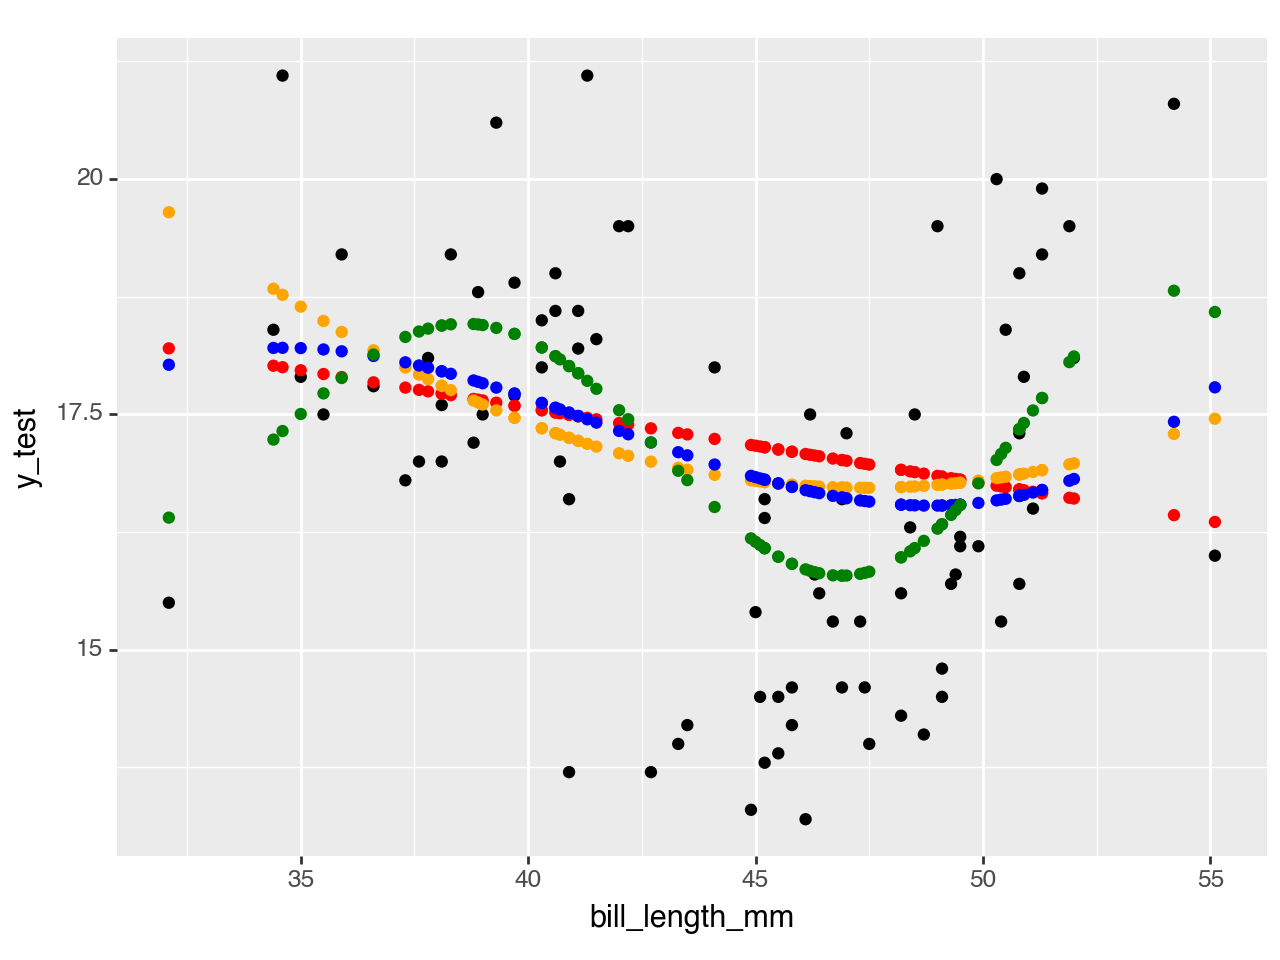

<Figure Size: (640 x 480)>

In [15]:
(ggplot(predictions, aes(x = "bill_length_mm", y = "y_test"))
 + geom_point()
 + geom_point(aes(y = "linear"), color = "red")
 + geom_point(aes(y = "quadratic"), color = 'orange')
 + geom_point(aes(y = "cubic"), color = "blue")
 + geom_point(aes(y = "poly_ten"), color = 'green')
)


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Models that look like they are underfitting is the linear model. It does not take into account the curve of the data. Models that look like they are overfitting are the cubic and polynomial 10 models. They are taking into account too much "noise" present in the data, so their models look wavy. The model that best fits the data is the quadratic model. It takes into account the curve of the data without adding too much "noise."

In [16]:
# #put all predicted values and actual values in one single dataframe

# X_test1["y_pred_linear"] = y_preds_linear
# X_test1

# X_test1["y_pred_quad"] = y_preds_quad
# X_test1

# X_test1["y_pred_cube"] = y_preds_cube
# X_test1

# X_test1["y_pred_ten"] = y_preds_ten
# X_test1

# X_test1["y_test"] = y_test1
# X_test1

In [17]:
# (ggplot(X_test1, aes(x = "bill_length_mm"))
# + geom_point(aes(y = "y_test"))
# + geom_point(aes(y = "y_pred_linear"), color = "red")
# + geom_point(aes(y = "y_pred_quad"), color = "blue")
# + geom_point(aes(y = "y_pred_cube"), color = "green")
# + geom_point(aes(y = "y_pred_ten"), color = "orange")
# )